In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introduction
This script will have plots (data visualizations) of H3K9Me3 experiment days that are considered to be crucial to refer back to answer the question of the project. The scripts that include the control plots can be found under script named: `200819_data_visualiztion_h3k9me3_200604-10,50` and `200821_data_visualiztion_h3k9me3_200615-10,50`. 

# table of contents
* [200604](#200604)
    * [200604 - 10%](#20060410)
    * [200604 - 50%](#20060450)
* [200615](#200615)
    * [200615 - 10%](#20061510)
    * [200615 - 50%](#20061550)

# 200604 <a name="200604"></a>
## Retrieve Data

In [26]:
# 200615 - file to pandas dataframe
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200604_h3k9me3'

## 10% threshold 
file=f'{bigDir}\\cellinfo_200604v6_10percent.csv'
data=pd.read_csv(file)
data=data.drop(columns=['Unnamed: 0']) # dropping the unnecessary column
data.to_csv(file) # resaving the csv file

## 50% threshold
file1=f'{bigDir}\\cellinfo_200604v6_50percent.csv'
data1=pd.read_csv(file1)
data1=data1.drop(columns=['Unnamed: 0']) #dropping unnecessary column
data1.to_csv(file1) # resaving the csv file

In [4]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (Heterochromatin),ab1 ch,ab2 (MCM),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200604_cell_00.ciz,200604_09_15_63X.czi,200604xy09,325.986,135.825,H3K9Me3,1,MCM2,2,3,...,0.100020,2.697250e+09,822467048.0,1.874783e+09,628945846.0,454611114.0,174334732.0,2.068304e+09,367855934.0,1.700448e+09
1,20200604_cell_01.ciz,200604_09_46_63X.czi,200604xy09,1103.256,483.760,H3K9Me3,1,MCM2,2,3,...,0.100014,2.321032e+09,899578615.0,1.421453e+09,490617687.0,340295962.0,150321725.0,1.830414e+09,559282653.0,1.271131e+09
2,20200604_cell_02.ciz,200604_09_51_63X.czi,200604xy09,1865.490,559.814,H3K9Me3,1,MCM2,2,3,...,0.100013,2.570708e+09,959263344.0,1.611445e+09,556729653.0,365812625.0,190917028.0,2.013979e+09,593450719.0,1.420528e+09
3,20200604_cell_03.ciz,200604_09_53_63X.czi,200604xy09,601.353,583.042,H3K9Me3,1,MCM2,2,3,...,0.100003,2.176022e+09,779353206.0,1.396669e+09,459623544.0,333437537.0,126186007.0,1.716398e+09,445915669.0,1.270483e+09
4,20200604_cell_04.ciz,200604_09_58_63X.czi,200604xy09,1577.064,627.569,H3K9Me3,1,MCM2,2,3,...,0.100028,2.687250e+09,828964429.0,1.858286e+09,554604150.0,367070421.0,187533729.0,2.132646e+09,461894008.0,1.670752e+09


In [5]:
data1.head()

,Unnamed: 0.1,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (Heterochromatin),ab1 ch,ab2 (MCM),ab2 ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,0,20200604_cell_00.ciz,200604_09_15_63X.czi,200604xy09,325.986,135.825,H3K9Me3,1,MCM2,2,...,0.500012,2.697250e+09,822467048.0,1.874783e+09,2.004453e+09,821272403.0,1.183180e+09,692797145.0,1194645.0,691602500.0
1,1,20200604_cell_01.ciz,200604_09_46_63X.czi,200604xy09,1103.256,483.760,H3K9Me3,1,MCM2,2,...,0.500009,2.321032e+09,899578615.0,1.421453e+09,1.796049e+09,887957601.0,9.080914e+08,524982545.0,11621014.0,513361531.0
2,2,20200604_cell_02.ciz,200604_09_51_63X.czi,200604xy09,1865.490,559.814,H3K9Me3,1,MCM2,2,...,0.500041,2.570708e+09,959263344.0,1.611445e+09,1.963019e+09,949256767.0,1.013762e+09,607689731.0,10006577.0,597683154.0
3,3,20200604_cell_03.ciz,200604_09_53_63X.czi,200604xy09,601.353,583.042,H3K9Me3,1,MCM2,2,...,0.500030,2.176022e+09,779353206.0,1.396669e+09,1.617514e+09,769429745.0,8.480846e+08,558507576.0,9923461.0,548584115.0
4,4,20200604_cell_04.ciz,200604_09_58_63X.czi,200604xy09,1577.064,627.569,H3K9Me3,1,MCM2,2,...,0.500053,2.687250e+09,828964429.0,1.858286e+09,1.979640e+09,817325173.0,1.162315e+09,707610736.0,11639256.0,695971480.0


<IPython.core.display.Javascript object>


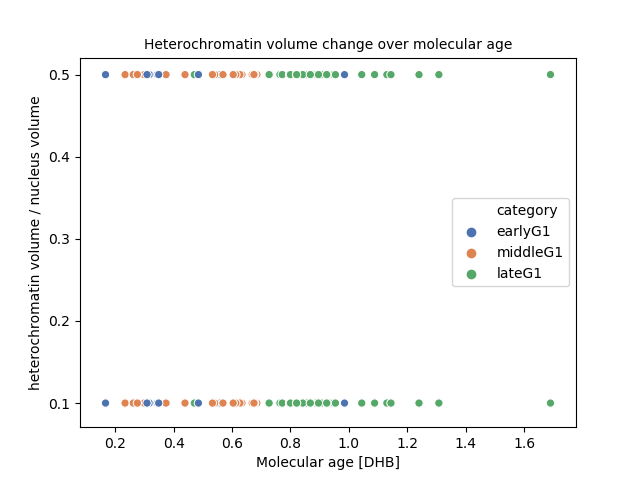

In [40]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
data1['temp']=data1.nuc_vol_het/data1.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],
                   hue='category',hue_order=labels, palette='deep')
sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],
                hue='category',hue_order=labels,palette='deep')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)


# changing the order of legend for category 
## initially ordered earlyG1, lateG1, middleG1
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4],labels[:4])

# Plots for 200604 - 10 % <a name="20060410"></a>

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


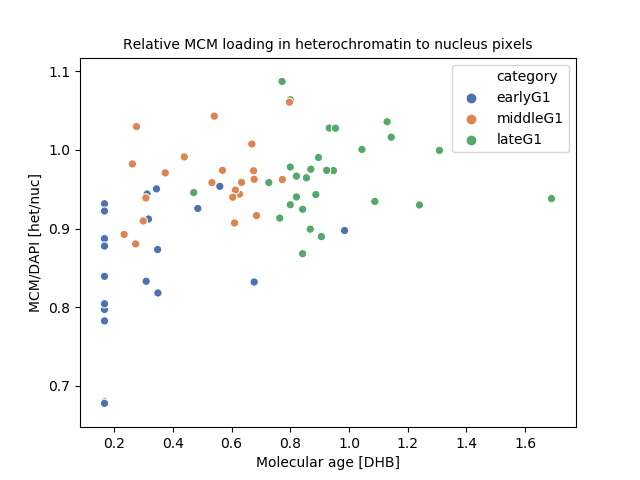

In [39]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

<IPython.core.display.Javascript object>


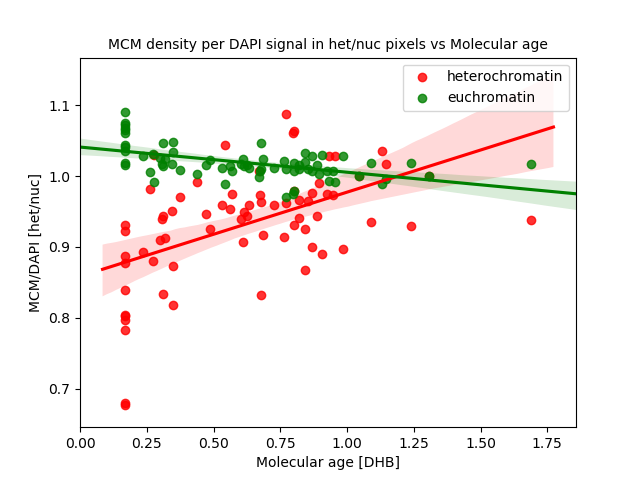

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [9]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


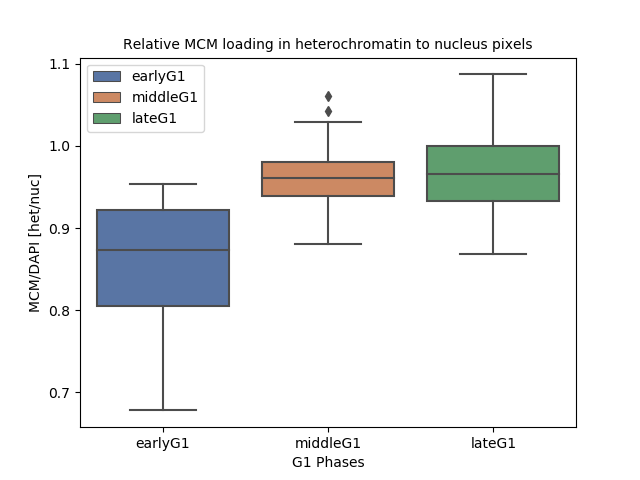

In [38]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.boxplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',order=['earlyG1','middleG1','lateG1'],hue_order=labels,dodge=False,palette='deep')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

# changing the order of legend for category 
## initially ordered earlyG1, lateG1, middleG1
handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles,labels)

## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


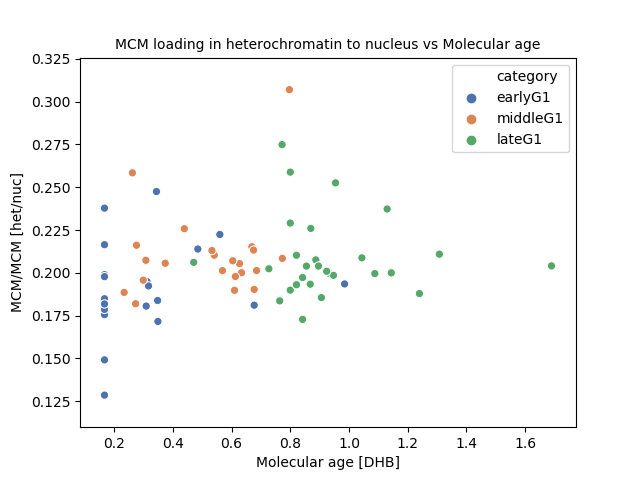

In [36]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

# changing the order of legend for category 
## initially ordered earlyG1, lateG1, middleG1
handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading to euchromatin to nucleus

<IPython.core.display.Javascript object>


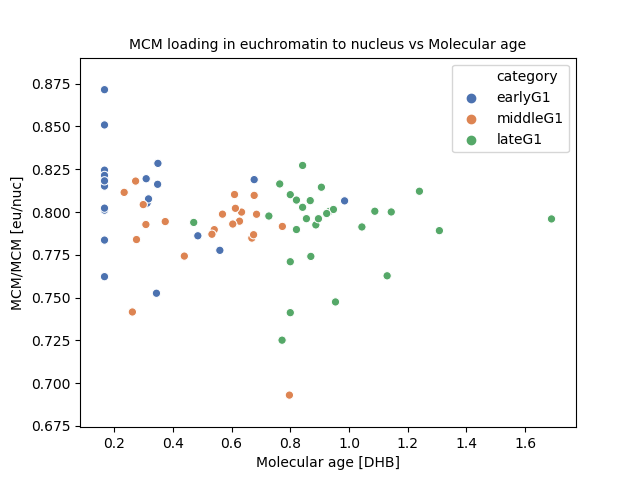

In [34]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

# changing the order of legend for category 
## initially ordered earlyG1, lateG1, middleG1
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4],labels[:4])

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


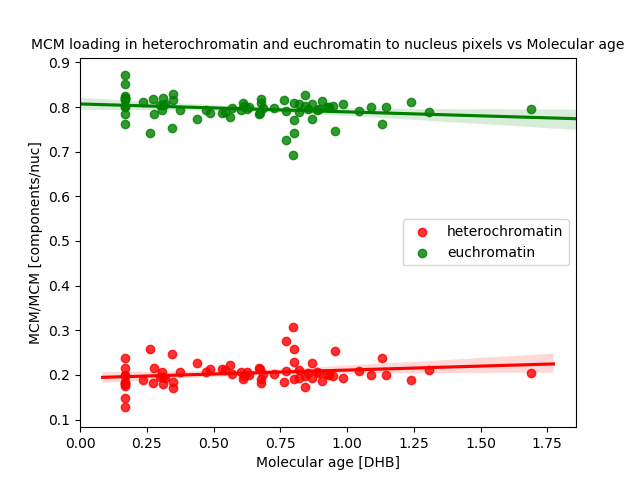

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [14]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


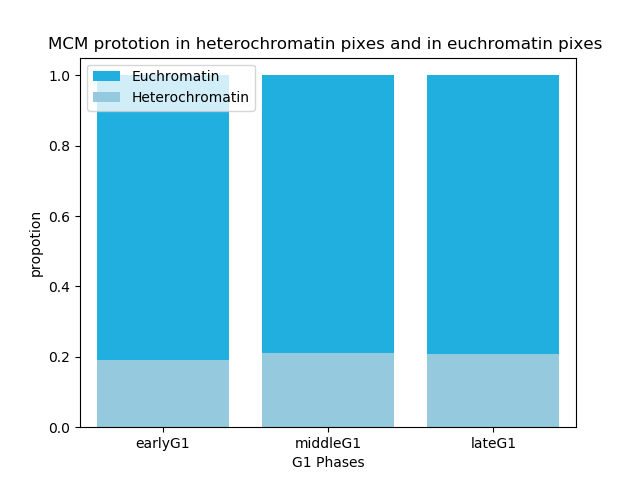

In [21]:
%matplotlib notebook
datatemp=data.loc[(['G1' in x for x in data.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM prototion in heterochromatin pixes and in euchromatin pixes ')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)

# Plots for 200604 - 50% <a name="20060450"></a>

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


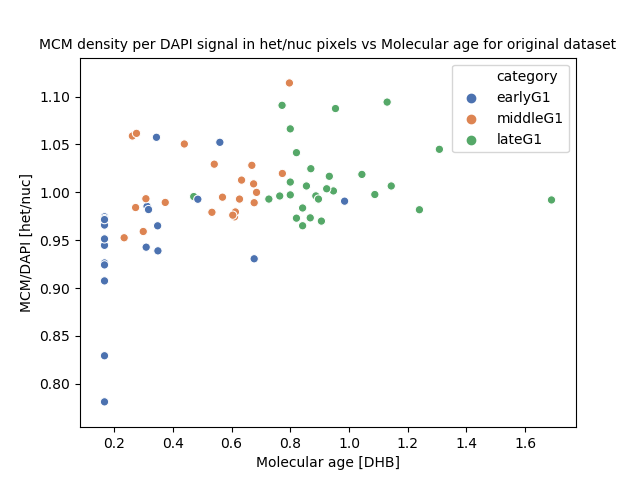

In [32]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :],
                  hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

<IPython.core.display.Javascript object>


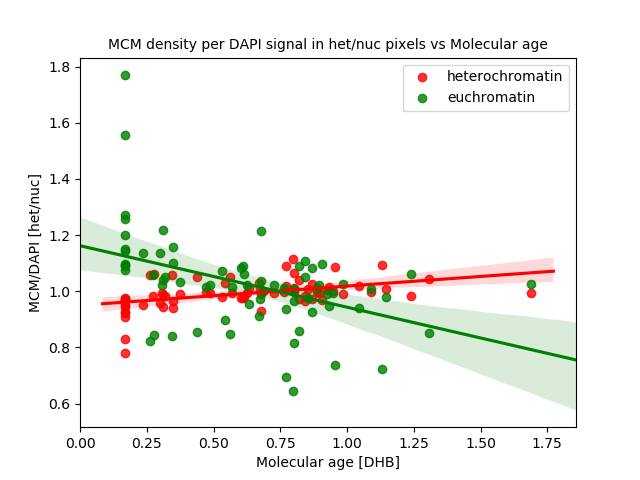

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [28]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :],color='r',label='heterochromatin')

data1['temp']=(data1.nuc_mcm_eu/data1.nuc_DAPI_eu)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


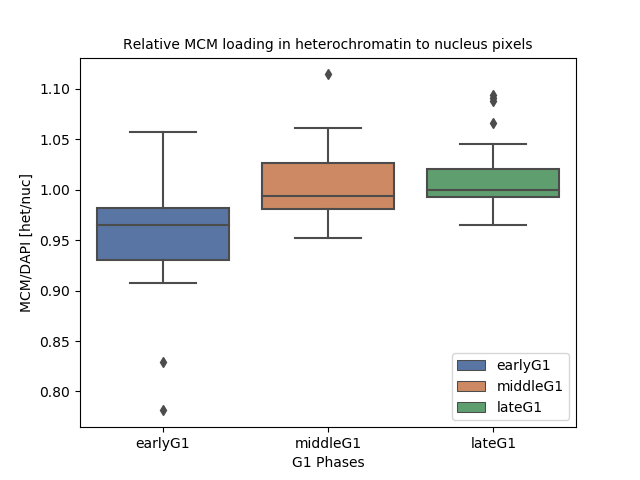

In [44]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',hue_order=['earlyG1','middleG1','lateG1'], order=['earlyG1','middleG1','lateG1'],
               dodge=False,palette='deep')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


# 'category' missing
# changing the order of legend for category 
## initially ordered earlyG1, lateG1, middleG1
handles, labels = ax.get_legend_handles_labels() #only considering the first 4 items in the label
# showing the last 4 labels and handles in the list.
ax.legend(handles,labels,loc='lower right')

## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


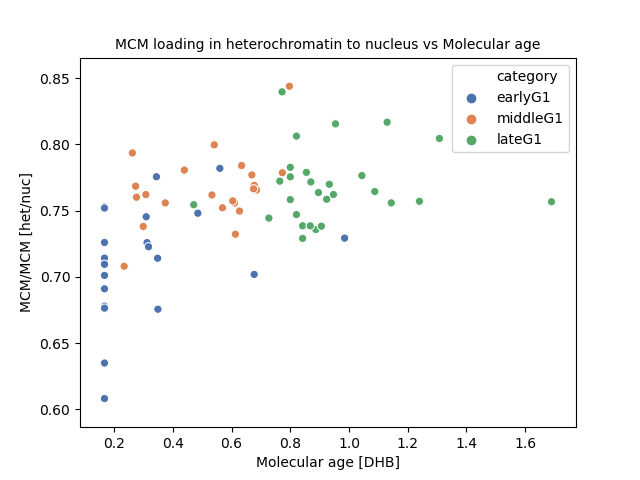

In [45]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_mcm_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',hue_order=['earlyG1','middleG1','lateG1'],palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)
handles, labels = ax.get_legend_handles_labels()
#only considering the first 4 items in the label
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading in euchromatin to nucleus

<IPython.core.display.Javascript object>


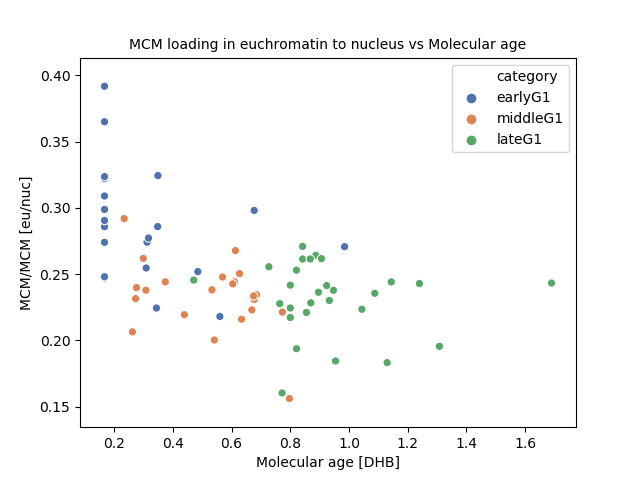

In [47]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_eu/data1.nuc_mcm_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',hue_order=['earlyG1','middleG1','lateG1'],palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


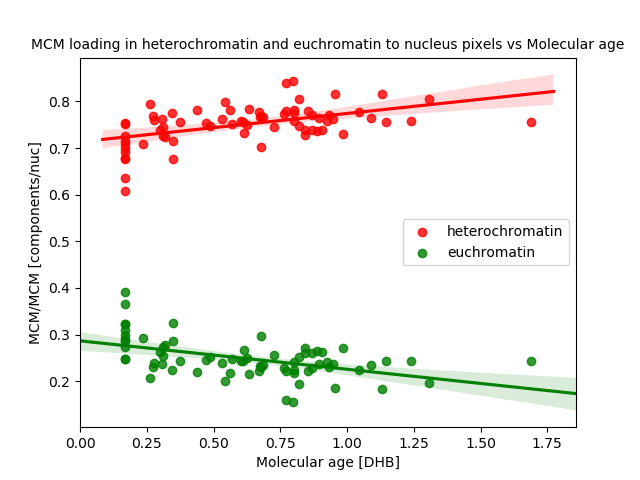

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [48]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :],color='r',
            label='heterochromatin')

data1['temp']=(data1.nuc_mcm_eu/data1.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], color='g',
            label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


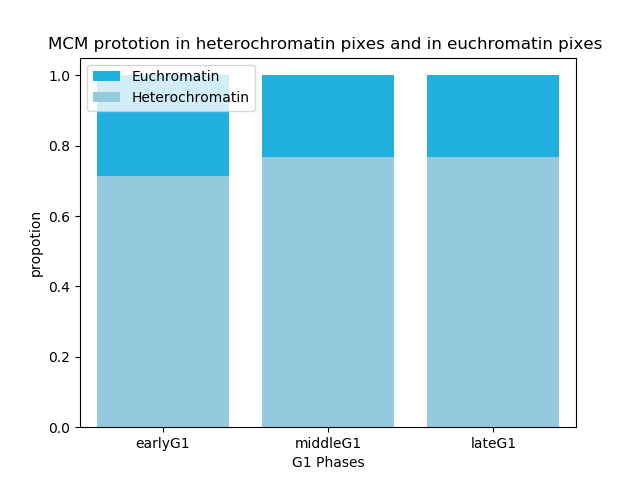

In [22]:
%matplotlib notebook
datatemp=data1.loc[(['G1' in x for x in data1.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM prototion in heterochromatin pixes and in euchromatin pixes ')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)

# 200615 <a name="200615"></a>
## Retrieve Data

In [49]:
# 200615 - file to pandas dataframe
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200615_h3k9me3'

## 10% threshold 
file=f'{bigDir}\\cellinfo_200615v6_10percent.csv'
data=pd.read_csv(file)
data=data.drop(columns=['Unnamed: 0']) # dropping the unnecessary column
data.to_csv(file) # resaving the csv file

## 50% threshold
file1=f'{bigDir}\\cellinfo_200615v6_50percent.csv'
data1=pd.read_csv(file1)
data1=data1.drop(columns=['Unnamed: 0']) #dropping unnecessary column
data1.to_csv(file1) # resaving the csv file

In [34]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200615_cell_00.ciz,20200615_29_11_63x.czi,200614xy29,1781.995,159.930,H3K9Me3,1,MCM2,2,3,...,0.100000,2.906368e+09,8.883452e+08,2.018023e+09,541422545.0,187973581.0,353448964.0,2.364945e+09,700371613.0,1.664574e+09
1,20200615_cell_01.ciz,20200615_29_18_63x.czi,200614xy29,1534.667,302.703,H3K9Me3,1,MCM2,2,3,...,0.100006,2.902209e+09,8.534346e+08,2.048775e+09,542010973.0,282857622.0,259153351.0,2.360198e+09,570576978.0,1.789622e+09
2,20200615_cell_02.ciz,20200615_29_23_63x.czi,200614xy29,558.209,366.997,H3K9Me3,1,MCM2,2,3,...,0.100004,2.678936e+09,8.294657e+08,1.849470e+09,469187384.0,171664012.0,297523372.0,2.209749e+09,657801691.0,1.551947e+09
3,20200615_cell_03.ciz,20200615_29_24_63x.czi,200614xy29,1147.608,371.829,H3K9Me3,1,MCM2,2,3,...,0.100000,3.867871e+09,1.053710e+09,2.814161e+09,630177628.0,210546841.0,419630787.0,3.237694e+09,843162929.0,2.394531e+09
4,20200615_cell_04.ciz,20200615_29_31_63x.czi,200614xy29,1649.449,469.520,H3K9Me3,1,MCM2,2,3,...,0.100007,3.541353e+09,1.288501e+09,2.252852e+09,668026585.0,452944462.0,215082123.0,2.873326e+09,835556815.0,2.037770e+09


In [35]:
data1.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200615_cell_00.ciz,20200615_29_11_63x.czi,200614xy29,1781.995,159.930,H3K9Me3,1,MCM2,2,3,...,0.500027,2.906368e+09,8.883452e+08,2.018023e+09,2.195022e+09,8.570760e+08,1.337946e+09,711346064.0,31269198.0,680076866.0
1,20200615_cell_01.ciz,20200615_29_18_63x.czi,200614xy29,1534.667,302.703,H3K9Me3,1,MCM2,2,3,...,0.500021,2.902209e+09,8.534346e+08,2.048775e+09,2.158831e+09,8.308982e+08,1.327933e+09,743378611.0,22536363.0,720842248.0
2,20200615_cell_02.ciz,20200615_29_23_63x.czi,200614xy29,558.209,366.997,H3K9Me3,1,MCM2,2,3,...,0.500000,2.678936e+09,8.294657e+08,1.849470e+09,1.975732e+09,8.043897e+08,1.171342e+09,703204338.0,25076034.0,678128304.0
3,20200615_cell_03.ciz,20200615_29_24_63x.czi,200614xy29,1147.608,371.829,H3K9Me3,1,MCM2,2,3,...,0.500002,3.867871e+09,1.053710e+09,2.814161e+09,2.869494e+09,1.028024e+09,1.841470e+09,998376893.0,25685695.0,972691198.0
4,20200615_cell_04.ciz,20200615_29_31_63x.czi,200614xy29,1649.449,469.520,H3K9Me3,1,MCM2,2,3,...,0.500024,3.541353e+09,1.288501e+09,2.252852e+09,2.582704e+09,1.268266e+09,1.314439e+09,958648758.0,20235773.0,938412985.0


<IPython.core.display.Javascript object>


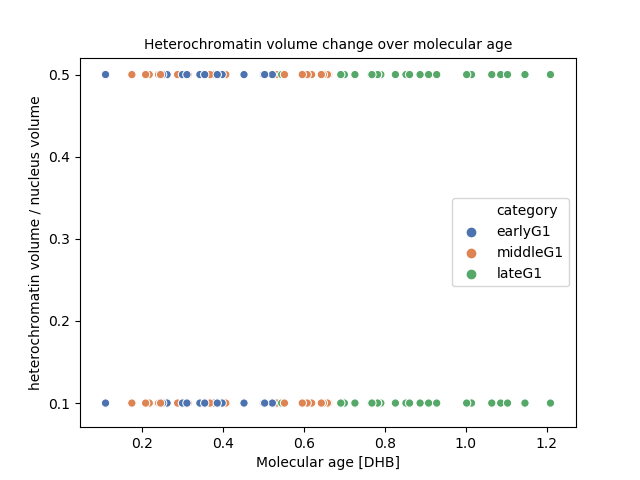

In [50]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
data1['temp']=data1.nuc_vol_het/data1.nuc_vol_total

ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],
                   hue='category',hue_order=['earlyG1','middleG1','lateG1'],palette='deep')
sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],
                hue='category',hue_order=['earlyG1','middleG1','lateG1'],palette='deep')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

# Plots for 200615 - 10 % <a name="20061510"></a>

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


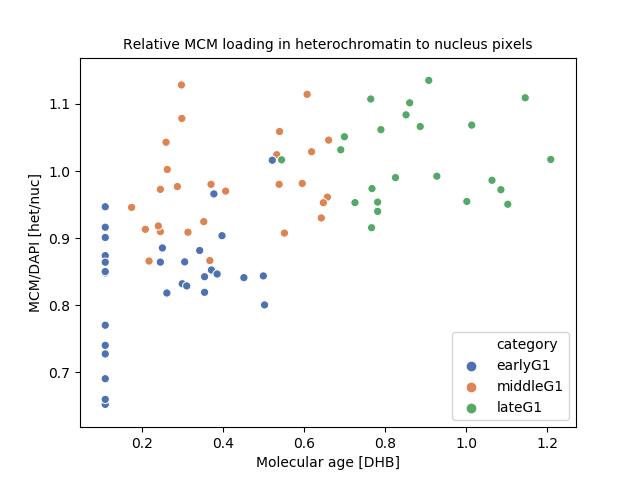

In [52]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=['earlyG1','middleG1','lateG1'],palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

<IPython.core.display.Javascript object>


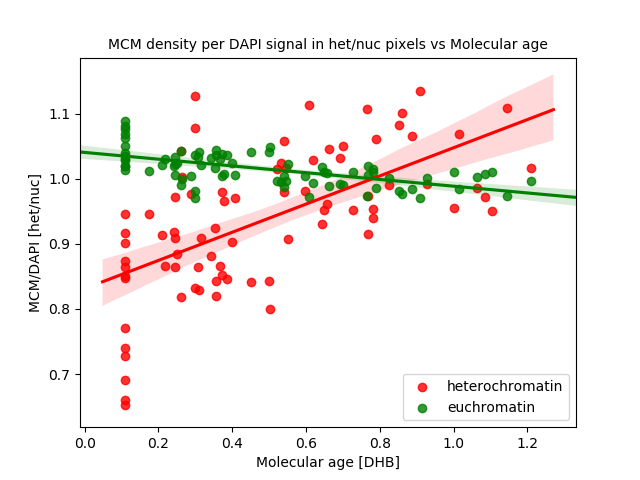

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [53]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',
            label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', 
            label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


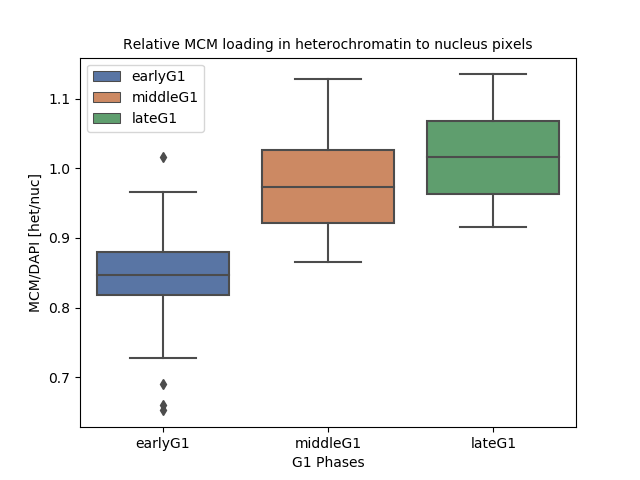

In [55]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
              hue='category',order=['earlyG1','middleG1','lateG1'], hue_order=['earlyG1','middleG1','lateG1'],
                dodge=False, palette='deep')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:3],labels[:3])

## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


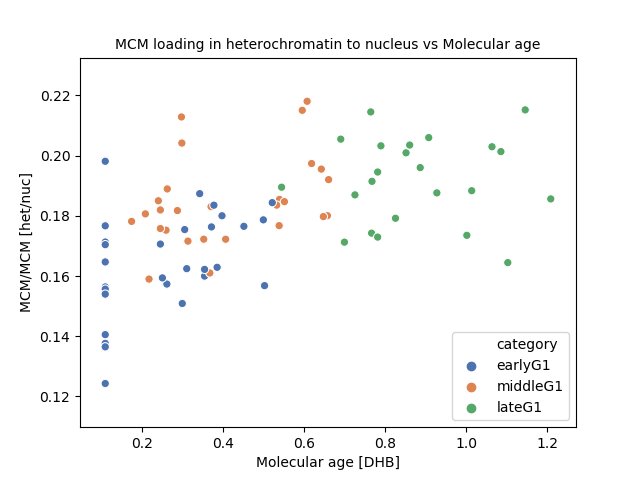

In [56]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order = ['earlyG1','middleG1','lateG1'], palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading to euchromatin to nucleus

<IPython.core.display.Javascript object>


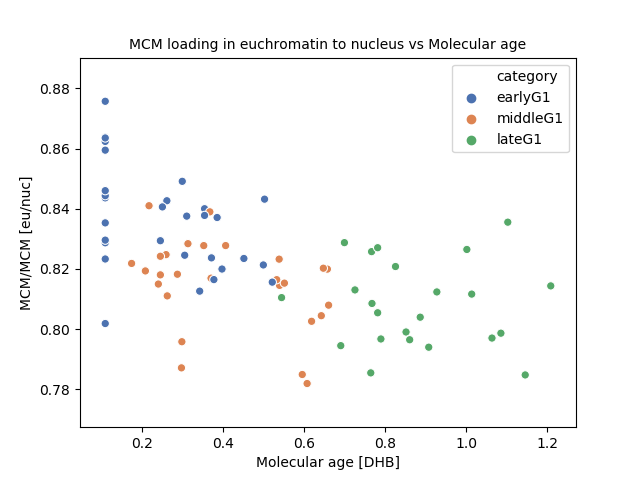

In [58]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category', hue_order=['earlyG1','middleG1','lateG1'], palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


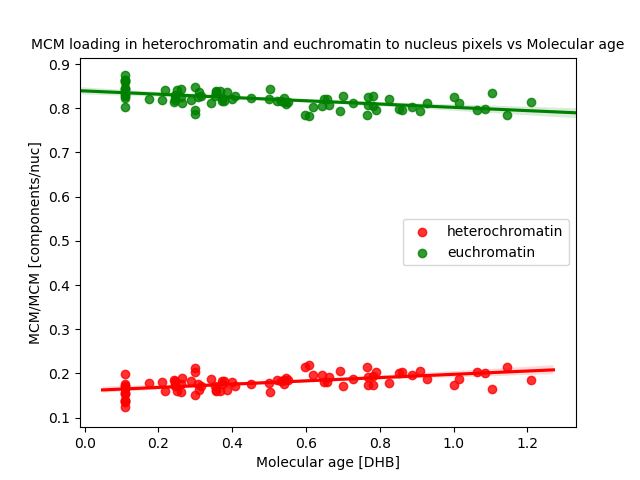

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [59]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',
           label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', 
           label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


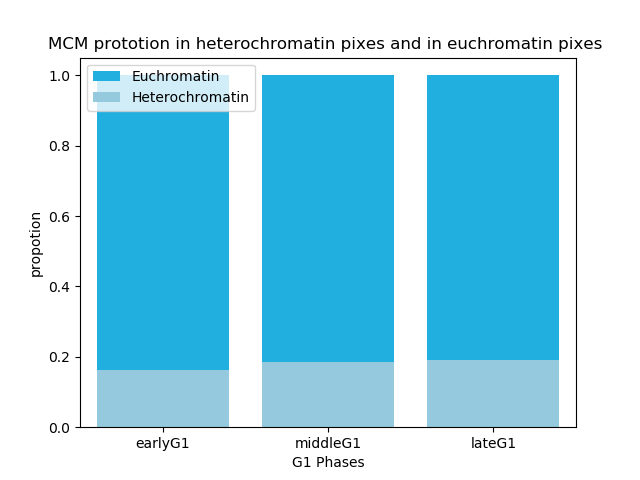

In [24]:
%matplotlib notebook
datatemp=data.loc[(['G1' in x for x in data.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM prototion in heterochromatin pixes and in euchromatin pixes ')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)

# Plots for 200615 - 50% <a name="20061550"></a>

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


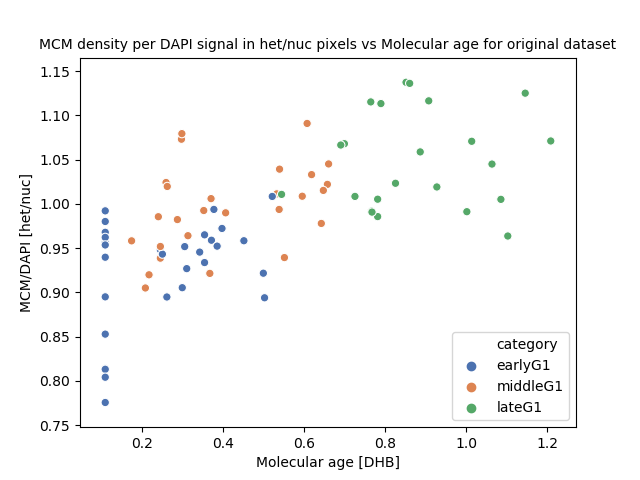

In [60]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
                   hue='category', hue_order=['earlyG1','middleG1','lateG1'], palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

<IPython.core.display.Javascript object>


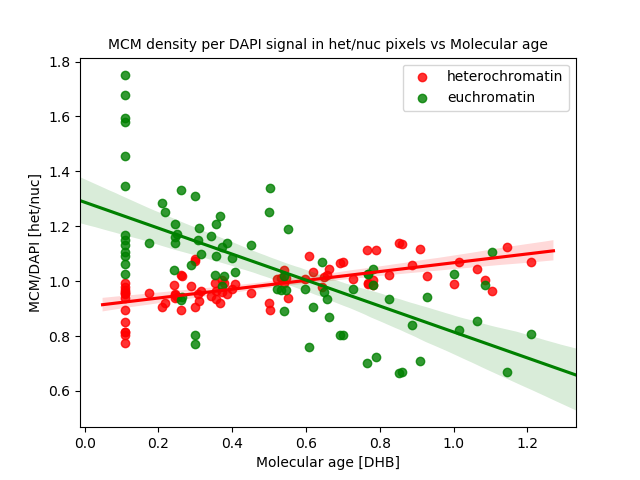

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [61]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :],color='r',
           label='heterochromatin')

data1['temp']=(data1.nuc_mcm_eu/data1.nuc_DAPI_eu)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], color='g', 
           label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


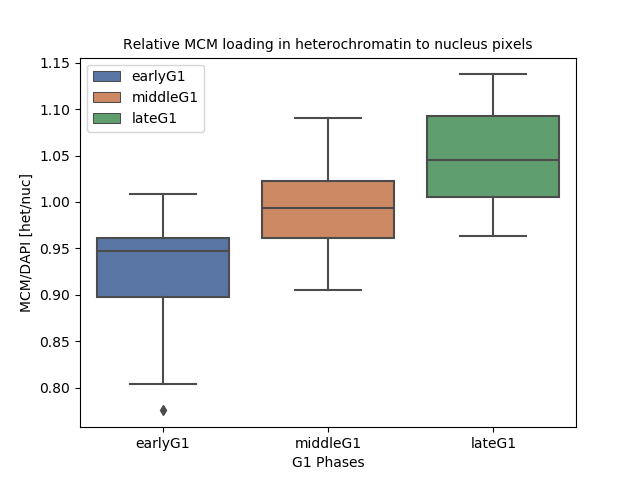

In [62]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',order=['earlyG1','middleG1','lateG1'],hue_order = ['earlyG1','middleG1','lateG1'],
               palette='deep',dodge=False)
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


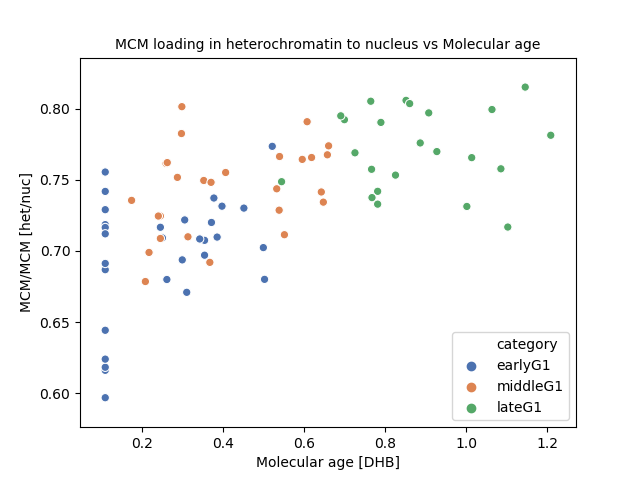

In [63]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_mcm_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category', hue_order=['earlyG1','middleG1','lateG1'], palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading in euchromatin to nucleus

<IPython.core.display.Javascript object>


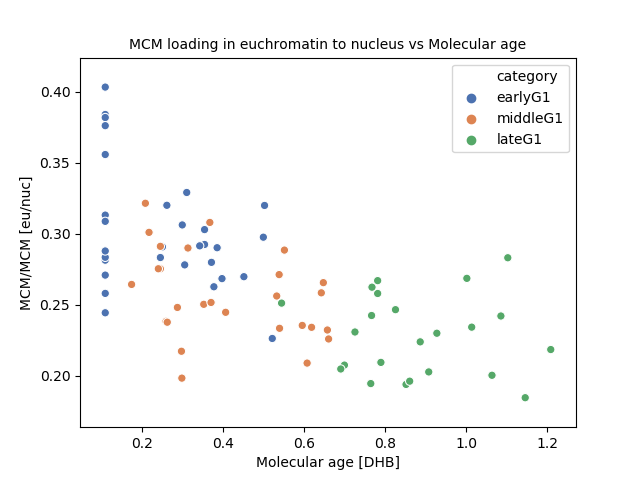

In [64]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_eu/data1.nuc_mcm_total)
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',hue_order=['earlyG1','middleG1','lateG1'], palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# showing the last 4 labels and handles in the list.
ax.legend(handles[:4],labels[:4])

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


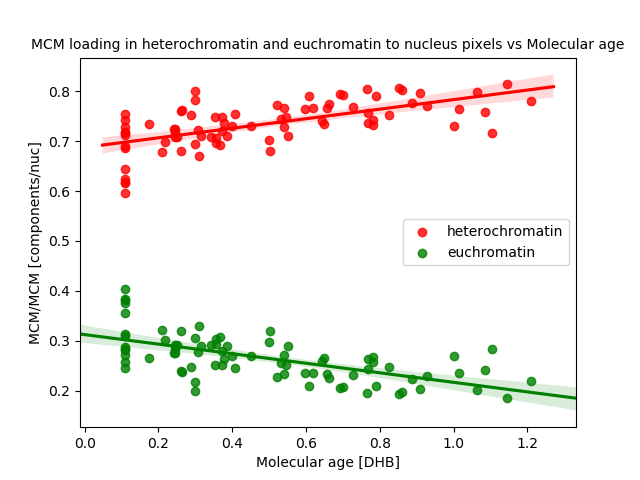

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [65]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :],color='r',label='heterochromatin')

data1['temp']=(data1.nuc_mcm_eu/data1.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


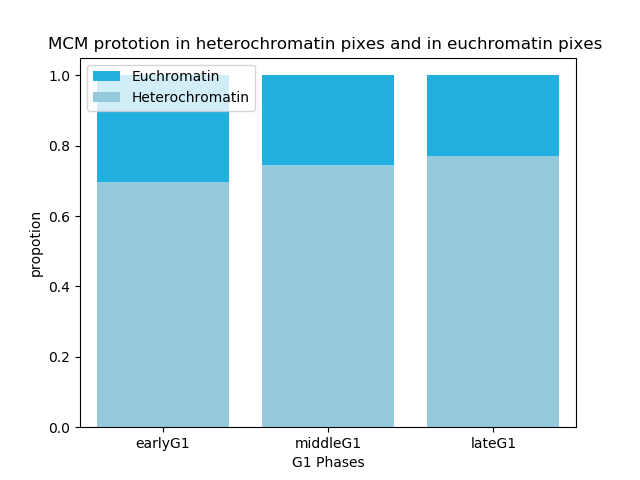

In [25]:
%matplotlib notebook
datatemp=data1.loc[(['G1' in x for x in data1.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM prototion in heterochromatin pixes and in euchromatin pixes ')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)